In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('https://raw.githubusercontent.com/datatrooper/instatrooper/master/styles/whitetrooper.mplstyle')
dp = [
    "#1c1c3c",
    "#967B4F",
    "#46493D",
    "#839DA5",
    "#9FADAD",
    "#2B4144",
    "#986E37"
]

In [20]:
df = pd.read_csv("../../../data/friends/FriendsLines.csv")
df["Character"] = df["Character"].str.lower()
df = df[df["Character"]!="[scene"]

In [21]:
df.head()

,Unnamed: 0,Character,Line
0,0,written by,Marta Kauffman & David Crane
1,1,transcribed by,guineapig
2,2,additional transcribing by,Eric Aasen
3,3,(note,The previously unseen parts of this episode a...
5,5,monica,There's nothing to tell! He's just some guy


In [22]:
df_grouped = df.groupby("Character")["Line"].count().to_frame("cuenta").sort_values("cuenta", ascending=False).reset_index().head(10)

In [41]:
df_grouped["Character"] = df_grouped["Character"].apply(lambda x: x[0].upper() + x[1:])
df_grouped

,Character,cuenta
0,Rachel,9079
1,Ross,9028
2,Chandler,8328
3,Monica,8216
4,Joey,8156
5,Phoebe,7364
6,Mike,359
7,All,338
8,Richard,247
9,Janice,217


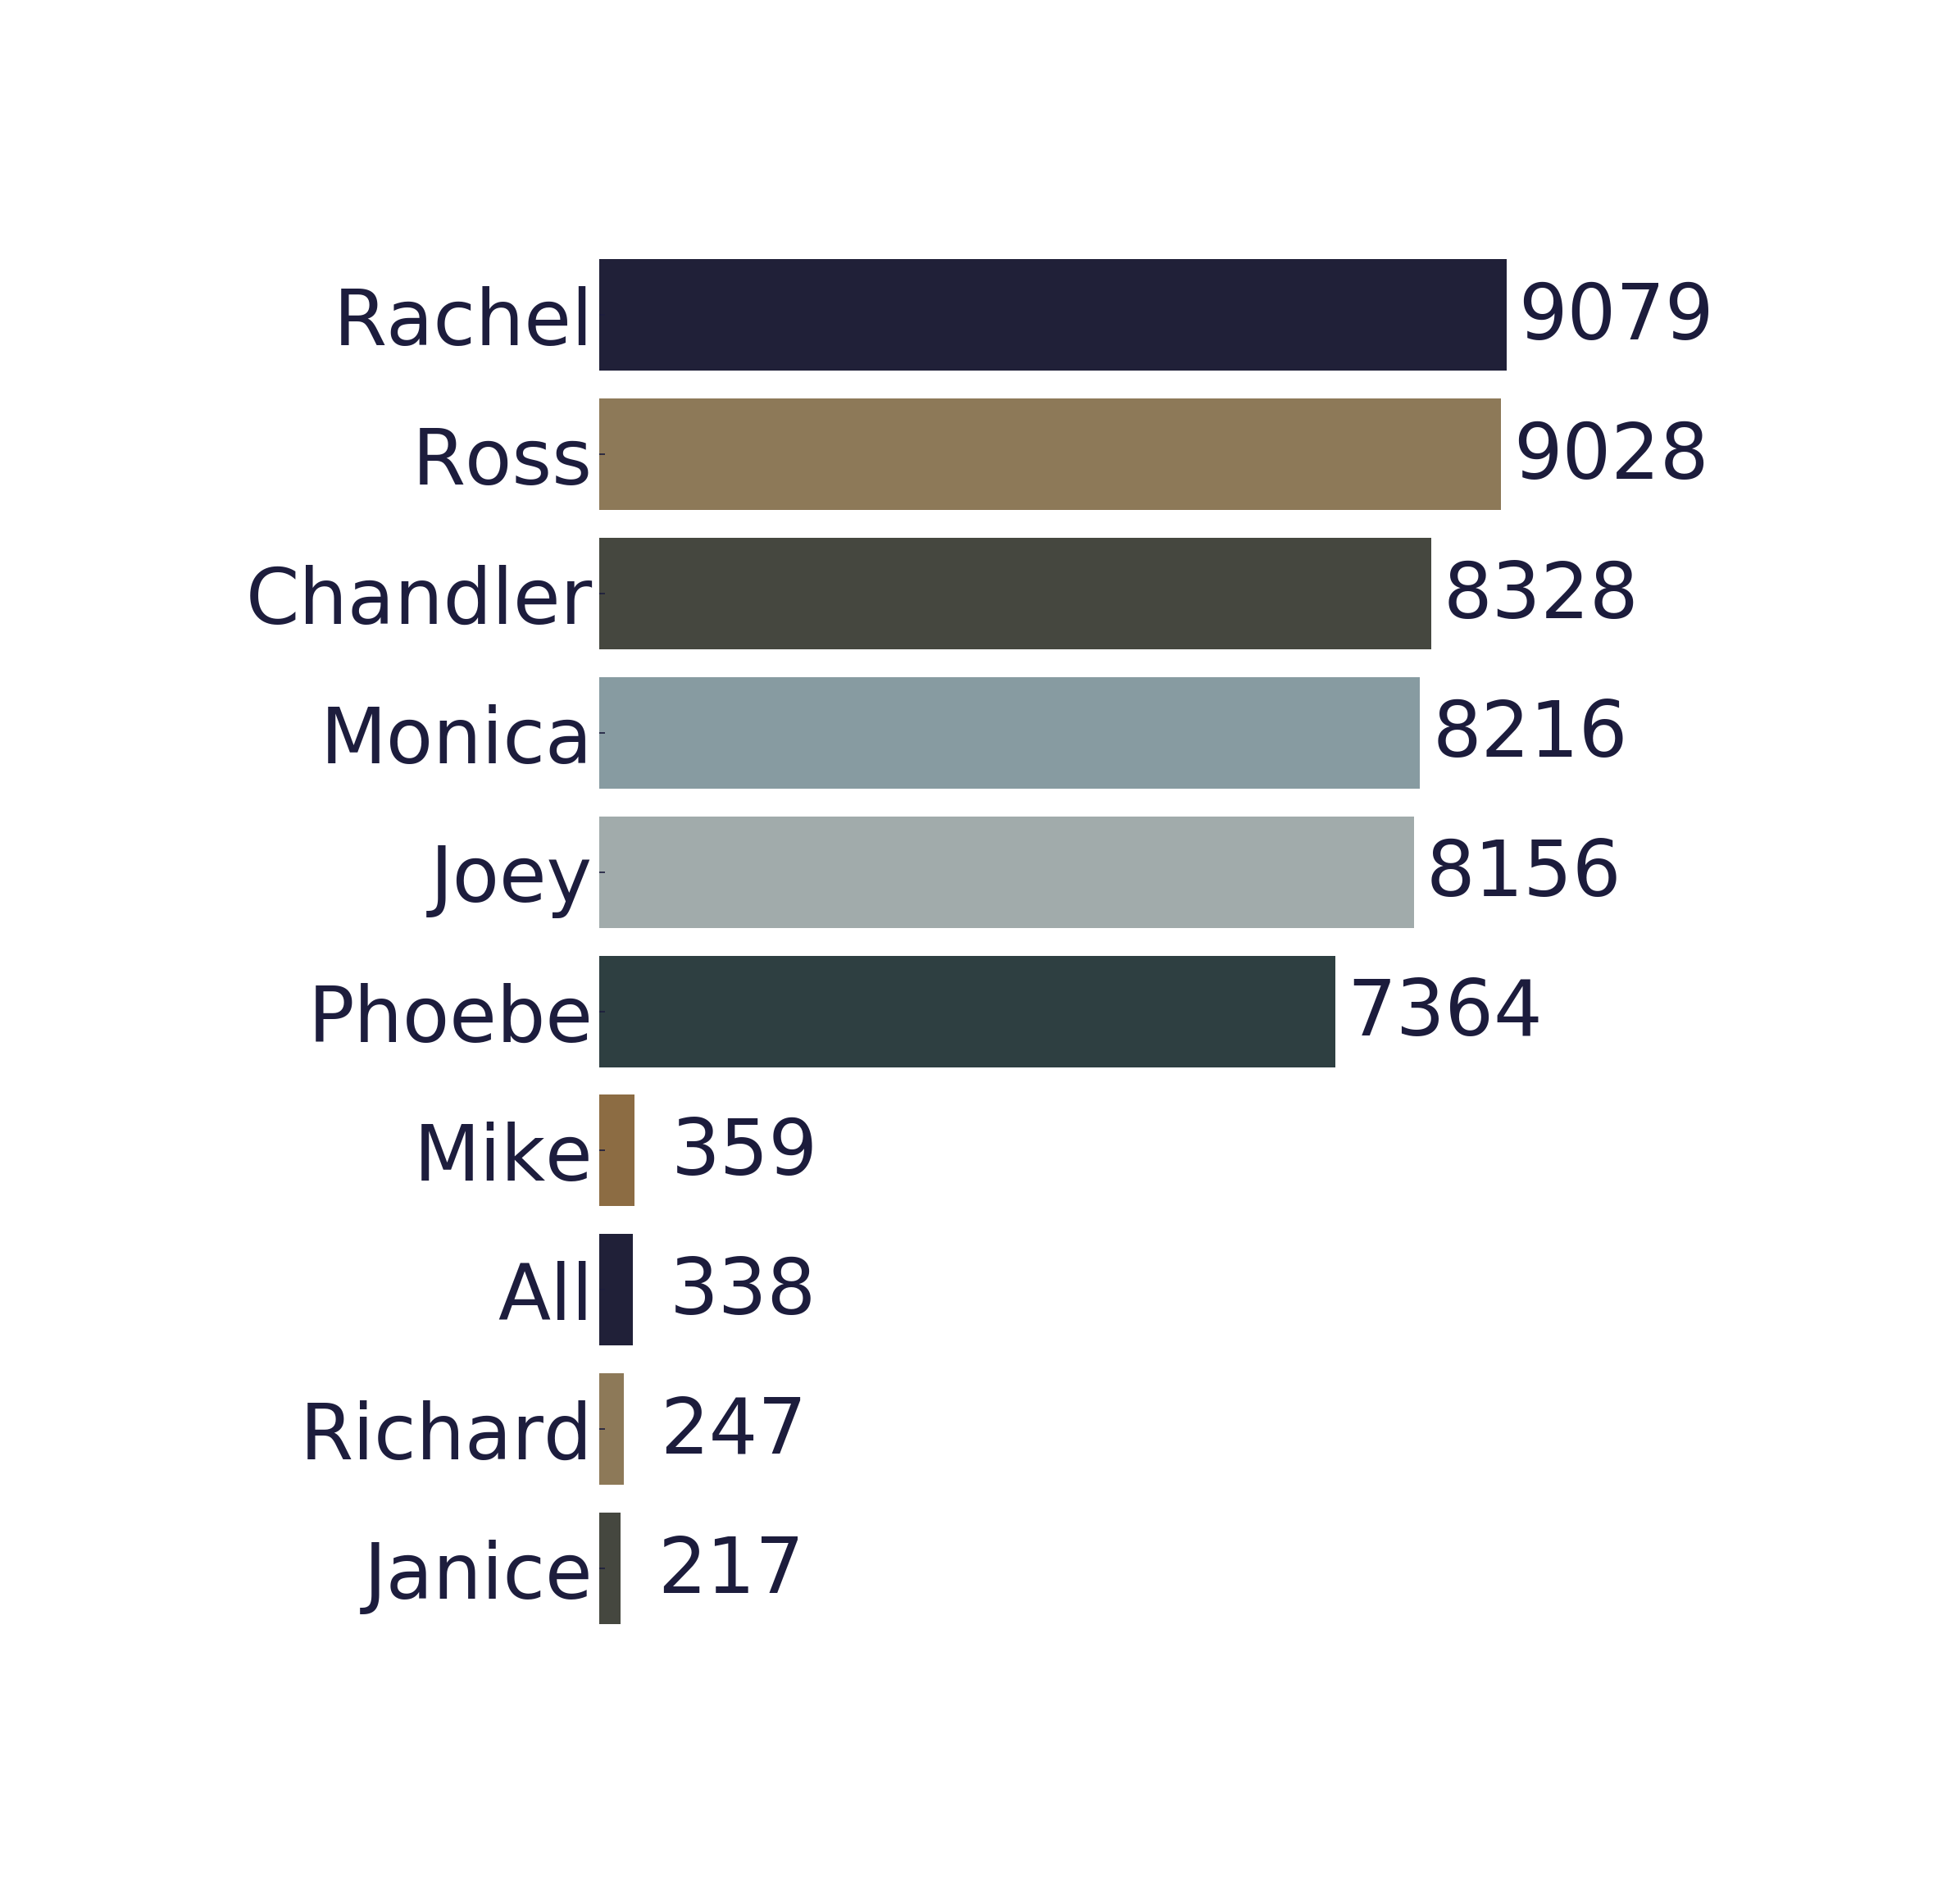

In [42]:
fig = plt.figure(figsize=(10,15))
ax = sns.barplot(y="Character", x="cuenta", orient="h", data=df_grouped, palette = dp)
plt.grid(False)

ax.set_xlabel("", fontsize=30)
plt.xticks([])
plt.box(False)
ax.set_ylabel("", fontsize=30)



# jugar con estos valores
vertical_offset = 0.17
horizontal_offset = 1100

ax.tick_params(axis='both', which='major', labelsize=45)
for index, row in df_grouped.head(10).iterrows():
    ax.text(row["cuenta"] + horizontal_offset,index+vertical_offset, # posicion
            row["cuenta"], # texto
            color='#1c1c3c', 
            ha="center", 
            size=45)
    
plt.savefig(f'spell7.png',bbox_inches='tight', transparent="True", pad_inches = 0)
plt.show()